In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [33]:
data_path = r"C:\Users\KIIT\AD LAB\SMSSpamCollection"  # Use raw string (r)
df = pd.read_csv(data_path, sep='\t', header=None, names=["label", "text"])
print(df.shape)
df.head()


(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


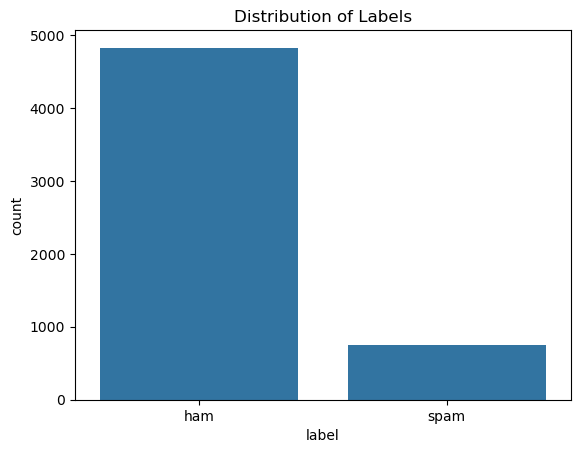

In [40]:
sns.countplot(x='label', data=df)
plt.title("Distribution of Labels")
plt.show()

In [42]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [50]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(message):
    message = message.lower()
    tokens = nltk.word_tokenize(message)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return " ".join(tokens)


In [52]:
df['cleaned_text'] = df['text'].apply(clean_text)
df[['text', 'cleaned_text']].head()

,text,cleaned_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt may ...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])


In [58]:
y = df['label'].map({'ham': 0, 'spam': 1})


In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [62]:
model = MultinomialNB(alpha=1.0)  # alpha is the smoothing parameter 
model.fit(X_train, y_train)

MultinomialNB()

In [64]:
y_pred = model.predict(X_test)

In [66]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9668161434977578
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



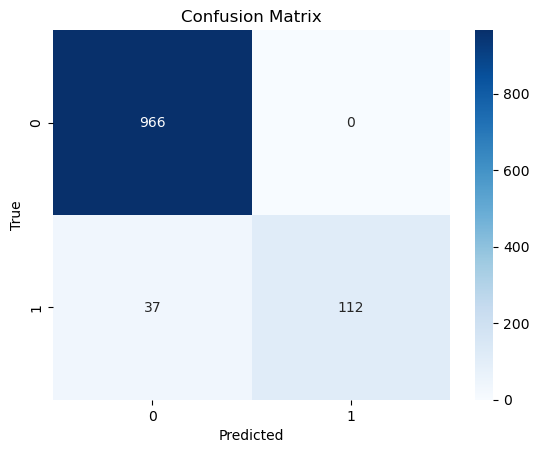

In [68]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()